# <b></span><span style='color:#007bff'>Project Objectives : </span></b>


1. Data Analysis:

Conducted thorough analysis of the student exam results dataset to understand key features and their distributions.

2. Model Development and Evaluation:

Developed and trained predictive models using Support Vector Regression (SVR) for Math, Reading, and Writing scores.
Evaluated model performance using metrics such as Mean Squared Error (MSE) and cross-validation techniques.

3. User Interface Creation:

Designed and implemented an interactive user interface using Gradio to allow users to input student data and obtain predicted scores.

4. End-to-End Solution:

Integrated data analysis, model development, and user interface into a cohesive system to provide a comprehensive tool for predicting student exam scores.

# 1: Student Exam Result Data



# <b></span><span style='color:#007bff'>Importing Necessary Libraries </span></b>



In [12]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score
import seaborn as sns
from sklearn.svm import SVR
import gradio as gr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
sns.reset_defaults() #reset to default


In [13]:
pip install plotly



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Loading the Dataset</span></b>


In [15]:
data = pd.read_csv("Expanded_data_with_more_features.csv")

In [16]:
data.sample(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
13674,509,female,group B,associate's degree,standard,none,married,sometimes,yes,0.0,private,5 - 10,53,63,65
21294,673,female,group C,NaN,standard,none,divorced,regularly,no,2.0,school_bus,5 - 10,81,86,83
2700,848,male,group D,master's degree,standard,completed,married,sometimes,no,1.0,private,5 - 10,96,95,99
11525,216,male,group D,high school,free/reduced,none,married,sometimes,yes,3.0,school_bus,5 - 10,66,75,64
25088,750,male,group D,some high school,standard,none,divorced,regularly,yes,5.0,NaN,> 10,84,81,76
6936,330,male,group A,some college,free/reduced,none,married,sometimes,NaN,NaN,private,< 5,76,73,72
16614,668,male,group C,some college,standard,NaN,married,regularly,yes,2.0,NaN,5 - 10,59,69,64
11324,3,female,group B,some college,free/reduced,none,divorced,NaN,yes,1.0,school_bus,> 10,33,53,56
24159,750,male,group D,associate's degree,standard,completed,married,sometimes,yes,2.0,school_bus,< 5,97,91,98
12624,395,male,group D,bachelor's degree,standard,none,married,sometimes,yes,3.0,school_bus,5 - 10,69,62,65


# <b></span><span style='color:#ff6200'>Dataset Description </span></b>


 * Gender: The gender of the student, can be either 'male' or 'female'.
 * EthnicGroup: The ethnic group of the student, ranging from 'group A' to 'group E'.
* ParentEduc: The education background of the student's parent(s), ranging from 'some_highschool' to 'master's degree'.
*  LunchType: The type of school lunch the student receives, either 'standard' or 'free/reduced'.
 * TestPrep: Indicates whether the student has completed a test preparation course, values are 'completed' or 'none'.
 * ParentMaritalStatus: The marital status of the student's parent(s), which can be 'married', 'single', 'widowed', or 'divorced'.
 * PracticeSport: Frequency of the student's sport practice, categorized as 'never', 'sometimes', or 'regularly'.
* IsFirstChild: Indicates if the student is the first child in the family, with values 'yes' or 'no'.
* NrSiblings: The number of siblings the student has, ranging from 0 to 7.
* TransportMeans: The student's means of transport to school, either 'schoolbus' or 'private'.
* WklyStudyHours: Weekly self-study hours categorized as 'less than 5hrs', 'between 5 and 10hrs', or 'more than 10hrs'.
* MathScore: The student's math test score, ranging from 0 to 100.
* ReadingScore: The student's reading test score, ranging from 0 to 100.
*  WritingScore: The student's writing test score, ranging from 0 to 100.




# <b></span><span style='color:#ff6200'>Initial Data Analysis </span></b>



# <b></span><span style='color:#ff6200'>Dataset Overview </span></b>



#### First I will perform a preliminary analysis to understand the structure and types of data columns:

In [17]:
data.head(3)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [18]:
number_of_sibline = data['NrSiblings'].value_counts()
number_of_sibline

NrSiblings
1.0    8217
2.0    6790
3.0    6123
0.0    3085
4.0    2941
5.0    1320
6.0     302
7.0     291
Name: count, dtype: int64

In [19]:
data["NrSiblings"].max()

7.0

In [20]:
#remove unnecessary
data.drop("Unnamed: 0", axis=1, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


# <b></span><span style='color:#ff6200'>Overview of the Data: </span></b>


 The dataset contains 30,641 entries with 14 columns.
 Each row represents a student and includes their demographic information, study habits, and test scores.

#### Column Information:
 
 Gender: No missing values, categorical data (male/female).
 EthnicGroup: 28,801 non-null entries, categorical data (group A to E), some missing values.
 ParentEduc: 28,796 non-null entries, categorical data (education level), some missing values.
 LunchType: No missing values, categorical data (standard/free or reduced).
 TestPrep: 28,811 non-null entries, categorical data (completed/none), some missing values.
 ParentMaritalStatus: 29,451 non-null entries, categorical data (marital status), some missing values.
 PracticeSport: 30,010 non-null entries, categorical data (frequency), some missing values.
 IsFirstChild: 29,737 non-null entries, categorical data (yes/no), some missing values.
 NrSiblings: 29,069 non-null entries, numerical data (0 to 7), some missing values.
 TransportMeans: 27,507 non-null entries, categorical data (schoolbus/private), some missing values.
 WklyStudyHours: 29,686 non-null entries, categorical data (study hours), some missing values.
 MathScore: No missing values, numerical data (0-100).
 ReadingScore: No missing values, numerical data (0-100).
 WritingScore: No missing values, numerical data (0-100).

#### Inferences:

1. There are some missing values in several columns, particularly EthnicGroup, ParentEduc, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, NrSiblings, TransportMeans, and WklyStudyHours.
 2. The dataset is a mix of categorical and numerical data, requiring different preprocessing techniques for each type.
 3. The target variables for prediction are MathScore, ReadingScore, and WritingScore, which are all numerical and have no missing values.
 4. Columns like Gender, LunchType, and MathScore do not have missing values and can be directly used for analysis.
 5. The dataset is fairly large, with over 30,000 entries, which is beneficial for training robust machine learning models.


# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Summary Statistics</span></b>

In [22]:
# Summary statistics for numerical variables
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']
numerical_summary = data[numerical_columns].describe().T.round()
numerical_summary

,count,mean,std,min,25%,50%,75%,max
NrSiblings,29069.0,2.0,1.0,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,67.0,15.0,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.0,15.0,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.0,15.0,4.0,58.0,69.0,79.0,100.0


In [23]:
# Summary statistics for categorical variables
categorical_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 
                       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 
                       'WklyStudyHours']
categorical_summary = data[categorical_columns].describe(include=['object']).T.round()
categorical_summary

,count,unique,top,freq
Gender,30641,2,female,15424
EthnicGroup,28801,5,group C,9212
ParentEduc,28796,6,some college,6633
LunchType,30641,2,standard,19905
TestPrep,28811,2,none,18856
ParentMaritalStatus,29451,4,married,16844
PracticeSport,30010,3,sometimes,15213
IsFirstChild,29737,2,yes,19082
TransportMeans,27507,2,school_bus,16145
WklyStudyHours,29686,3,5 - 10,16246


In [24]:
plt.figure(figsize=(5,5))
sns.boxplot(data['NrSiblings'])

<Axes: ylabel='NrSiblings'>

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
NrSiblings,29069.0,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


<h3 align="left"><font color=#ff6200>Inferences:</font></h3>

### Numerical Variables:

 NrSiblings: Mean is 2, ranging from 0 to 7, most have 1-3 siblings.
 MathScore: Mean is 67, ranging from 0 to 100, most scores between 56 and 78.
 ReadingScore: Mean is 69, ranging from 10 to 100, most scores between 59 and 80.
 WritingScore: Mean is 68, ranging from 4 to 100, most scores between 58 and 79.
 
 
 ### Categorical Variables:

 Gender: Two categories (male, female), mostly female (15,424).
 EthnicGroup: Five categories (group A-E), mostly group C (9,212).
 ParentEduc: Six categories (some_highschool to master's), mostly some college (6,633).
 LunchType: Two categories (standard, free/reduced), mostly standard (19,905).
 TestPrep: Two categories (completed, none), mostly none (18,856).
 ParentMaritalStatus: Four categories (married, single, widowed, divorced), mostly married (16,844).
 PracticeSport: Three categories (never, sometimes, regularly), mostly sometimes (15,213).
 IsFirstChild: Two categories (yes, no), mostly yes (19,082).
 TransportMeans: Two categories (schoolbus, private), mostly schoolbus (16,145).
 WklyStudyHours: Three categories (less than 5hrs, 5-10hrs, more than 10hrs), mostly 5-10hrs (16,246).



# <b></span><span style='color:#ff6200'>Data Cleaning & Preprocessing
</span></b>


In [26]:
# Rename the column 
data.rename(columns={'TransportMeans': 'School_Bus'}, inplace=True)

In [27]:
# Define mappings for categorical variables
study_hours_mapping = {
    '< 5': 'Less than 5 hours',
    '5 - 10': 'Between 5-10 hours',
    '> 10': 'More than 10 hours'
}

first_child_mapping = {
    'no': 0,
    'yes': 1
}

test_preparation_mapping = {
    'none': 0,
    'completed': 1
}

transport_means_mapping = {
    'private': 0,
    'school_bus': 1
}

# Apply the mappings to the corresponding columns in the DataFrame
data['WklyStudyHours'] = data['WklyStudyHours'].map(study_hours_mapping)
data['IsFirstChild'] = data['IsFirstChild'].map(first_child_mapping)
data['TestPrep'] = data['TestPrep'].map(test_preparation_mapping)
data['School_Bus'] = data['School_Bus'].map(transport_means_mapping)



In [28]:
data.sample(2)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,School_Bus,WklyStudyHours,MathScore,ReadingScore,WritingScore
11148,male,group E,some college,standard,0.0,single,regularly,1.0,0.0,1.0,Less than 5 hours,60,46,46
12894,male,group B,NaN,standard,1.0,married,never,1.0,2.0,0.0,Between 5-10 hours,72,70,68


In [29]:
#convert float type to integer
data['NrSiblings'] = data['NrSiblings'].astype(pd.Int64Dtype())

In [30]:
# features with numerical data types
data.select_dtypes(include=np.number).columns

Index(['TestPrep', 'IsFirstChild', 'NrSiblings', 'School_Bus', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [31]:
# features with categorical data types
data.select_dtypes(exclude=np.number).columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'ParentMaritalStatus', 'PracticeSport', 'WklyStudyHours'],
      dtype='object')

In [32]:
print(f"{data.shape[0]} rows and {data.shape[1]} columns")

30641 rows and 14 columns



# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Handling Duplicates</span></b>

In [33]:
# Handle duplicates
data.duplicated().sum()

0

* No duplicate values

# <b><span style='color:#fcc36d'> </span><span style='color:#ff6200'> Handling Missing Values</span>

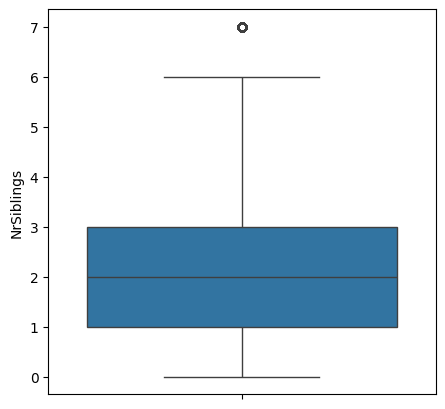

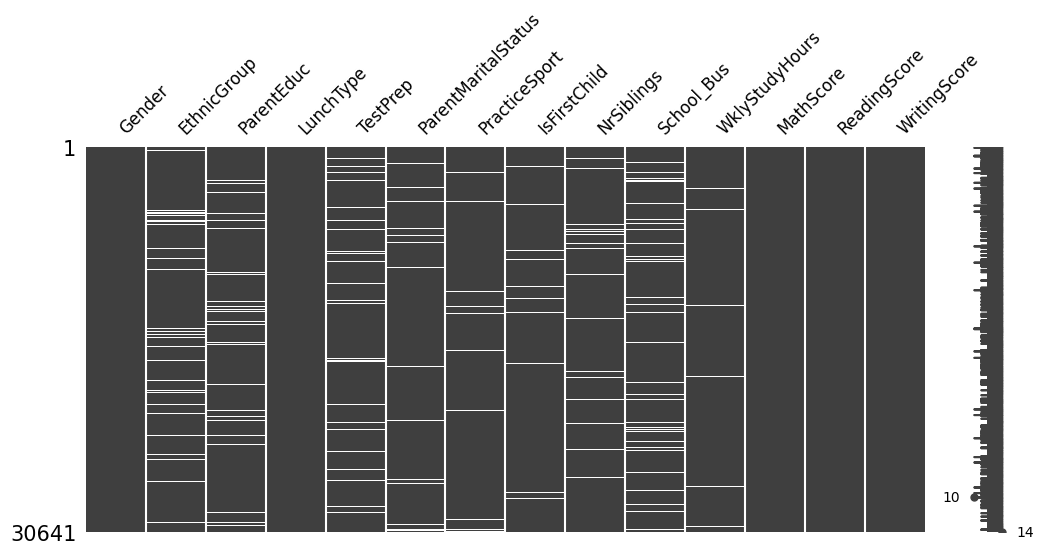

In [34]:

msno.matrix(data, figsize=(12, 5), fontsize=12)
plt.show()


### Understanding the Missing Data Matrix Plot:

 * The matrix plot visualizes the missing data in the dataset.
 - Vertical Axis (left side): Represents the row index (1 to 30,641).
 - Horizontal Axis (top): Represents the column names of the dataset.

### Color Coding:
 - Dark Cells: Indicate non-missing (existing) data.
 - White or Light Cells: Indicate missing data.

### Right-side Bar:
 - Shows the count of missing values for each row, helping identify rows with significant missing data.

### Column-wise Observations:
 - 'Gender', 'LunchType', 'MathScore', 'ReadingScore', 'WritingScore' columns are fully dark, indicating no missing values.
 
 - 'EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 
   'NrSiblings', 'TransportMeans', and 'WklyStudyHours' have white gaps indicating missing values.

### Insights:
 - Fully Complete Features: 'Gender', 'LunchType', 'MathScore', 'ReadingScore', 'WritingScore' 
   can be used directly as they have no missing data.
 - Partially Complete Features: Other columns need imputation or handling of missing values.
 - Row-wise Considerations: The right-side bar shows rows with more missing values, which might be candidates for removal.


In [35]:
data.isnull().sum().sort_values(ascending=False)

School_Bus             3134
ParentEduc             1845
EthnicGroup            1840
TestPrep               1830
NrSiblings             1572
ParentMaritalStatus    1190
WklyStudyHours          955
IsFirstChild            904
PracticeSport           631
Gender                    0
LunchType                 0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

* five columns with no missing values

In [36]:
#percentage of missing values
missing = data.isnull().sum()
total = len(data)
missing_perc = round((missing/total) * 100,2)
missing_perc.sort_values(ascending=False)

School_Bus             10.23
ParentEduc              6.02
EthnicGroup             6.01
TestPrep                5.97
NrSiblings              5.13
ParentMaritalStatus     3.88
WklyStudyHours          3.12
IsFirstChild            2.95
PracticeSport           2.06
Gender                  0.00
LunchType               0.00
MathScore               0.00
ReadingScore            0.00
WritingScore            0.00
dtype: float64

### Interpolation:

Interpolation estimates missing data by assuming a linear relationship between neighboring known values, filling in gaps by connecting the nearest points.
In pandas, interpolate() fills missing values assuming they lie on the line between the adjacent known points.
Mean/Median Imputation:

### Mean/Median 
 
imputation replaces missing numeric data with the mean or median of the feature.
This method is effective for data missing completely at random, particularly when the feature's distribution is symmetric.
Mode Imputation:

### Mode imputation

replaces missing categorical data with the most frequently occurring value (mode) of the feature.
This technique is useful for categorical data where the mode represents the missing values well.

In [37]:
# Interpolate for numerical value using forward fill and backward fill

data['NrSiblings'] = data['NrSiblings'].fillna(method='ffill').fillna(method='bfill')

# Use Mode for categorical columns

data['EthnicGroup'] = data['EthnicGroup'].fillna(data['EthnicGroup'].mode()[0])
data['WklyStudyHours'] = data['WklyStudyHours'].fillna(data['WklyStudyHours'].mode()[0])
data['ParentEduc'] = data['ParentEduc'].fillna(data['ParentEduc'].mode()[0])
data['ParentMaritalStatus'] = data['ParentMaritalStatus'].fillna(data['ParentMaritalStatus'].mode()[0])

# Use Mode for binary columns

data['IsFirstChild'] = data['IsFirstChild'].fillna(data['IsFirstChild'].mode()[0])
data['PracticeSport'] = data['PracticeSport'].fillna(data['PracticeSport'].mode()[0])
data['TestPrep'] = data['TestPrep'].fillna(data['TestPrep'].mode()[0])
data['School_Bus'] = data['School_Bus'].fillna(data['School_Bus'].mode()[0])



In [38]:
#No more missing values
data.isnull().sum().sum()

0

# <b><span style='color:#fcc36d'> </span><span style='color:#ff6200'> Data Analysis & Data Visualization </span>



## <b><span style='color:#fcc36d'> </span><span style='color:#007bff'> Univariate Analysis, Bivariate and Multivariate Analysis </span>
    

#### Parent(s) Education Level

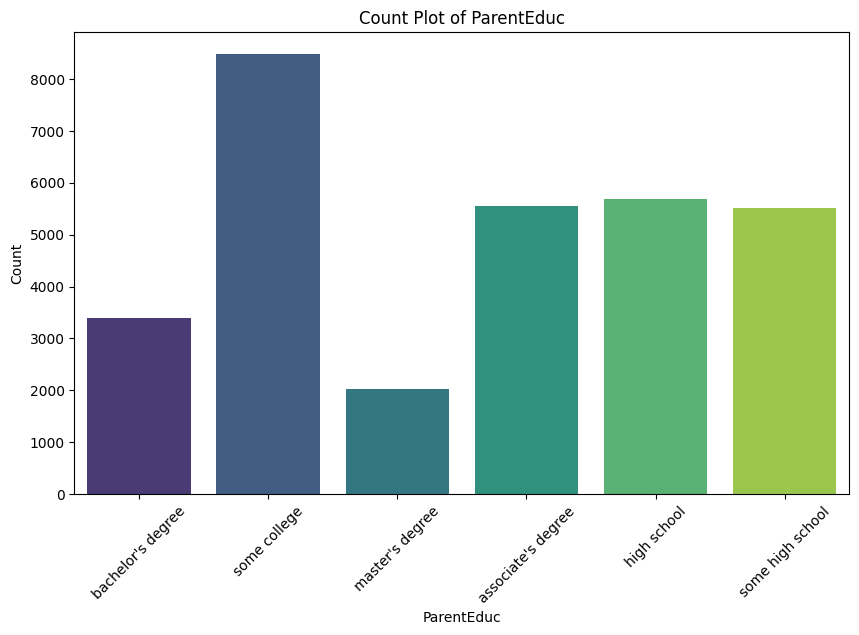

In [39]:


def count_plot(data, column_name):
    """
    Creates a count plot for a specified column in the DataFrame.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    
    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column_name, palette='viridis')
    plt.title(f'Count Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

count_plot(data, 'ParentEduc')


* The least of them have a master's degree. 
* The most of them have done some college (dropped out of college) 
* General trend in between associate's degree, high school and some high school (dropped out of high school)

####  Gender

In [40]:
plt.figure(figsize=(7,6))
plot = sns.countplot(x=data['Gender'])
for p in plot.patches:
    
    plot.annotate(f"{p.get_height()}", (p.get_x() 
                                           + p.get_width() / 2, p.get_height()), 
                     ha="center", va="bottom", fontsize=9)

plt.title('Gender Distribution')

Text(0.5, 1.0, 'Gender Distribution')

* The number of male and females are roughly the same

In [41]:
data.groupby('Gender')[['ReadingScore', 'MathScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])

ReadingScore                       MathScore                       \
               mean        std amax amin       mean        std amax amin   
Gender                                                                     
female    72.853216  14.267718  100   16  64.080654  15.238172  100    0   
male      65.854571  14.409589  100   10  69.069856  15.076223  100    7   

       WritingScore                       
               mean        std amax amin  
Gender                                    
female    72.856457  14.660205  100   10  
male      63.920418  14.907079  100    4

In [42]:
#Alternate way of achieving the result above
pivot = pd.pivot_table(
    data, 
    values=['ReadingScore', 'MathScore', 'WritingScore'], 
    index='Gender', 
    #columns='City', 
    aggfunc={
        'ReadingScore': ['mean', 'max', 'min'],
        'MathScore': ['mean', 'max', 'min'],
        'WritingScore': ['mean', 'max', 'min']}
)

pd.DataFrame(pivot)

MathScore                ReadingScore                WritingScore  \
             max       mean min          max       mean min          max   
Gender                                                                     
female       100  64.080654   0          100  72.853216  16          100   
male         100  69.069856   7          100  65.854571  10          100   

                       
             mean min  
Gender                 
female  72.856457  10  
male    63.920418   4

#### Observation:
* Female students generally have lower average math scores compared to their reading and writing scores, especially when compared to male students.
* The minimum math score for females is 0, while for males it is 4.
* The maximum score in all subjects is 100 for both genders.
* Female students outperform male students in reading and writing, while male students excel in math.
* Male students have more uniform performance across all subjects, whereas female students show higher performance in reading and writing.

### Age

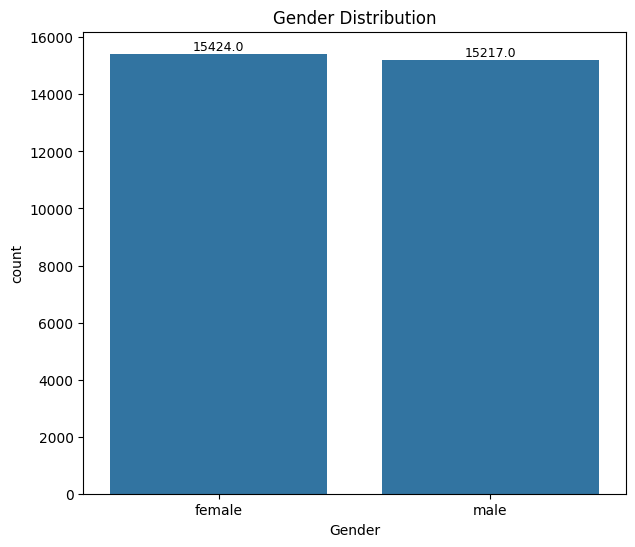

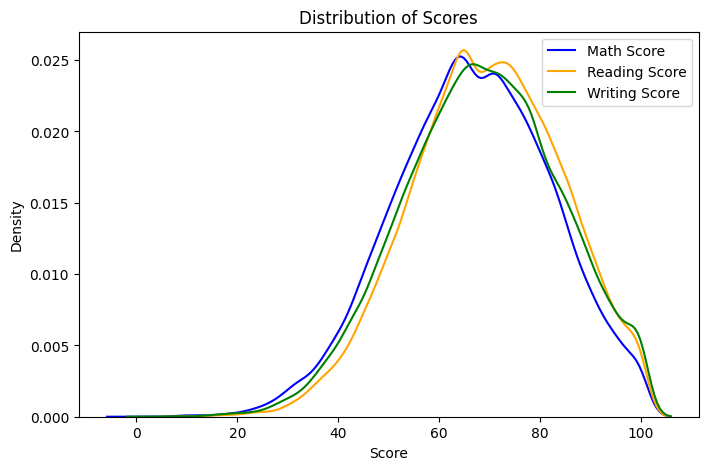

In [43]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Distribution plot of MathScore with custom color
sns.distplot(data['MathScore'], hist=False, kde=True, label='Math Score', color='blue')

# Distribution plot of ReadingScore with custom color
sns.distplot(data['ReadingScore'], hist=False, kde=True, label='Reading Score', color='orange')

# Distribution plot of WritingScore with custom color
sns.distplot(data['WritingScore'], hist=False, kde=True, label='Writing Score', color='green')

# Set axis labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.set_title('Distribution of Scores')

# Add a legend
ax.legend()

# Display the combined distribution plot
plt.show()


#### Insights:

Reading Scores: Tend to be slightly higher, as indicated by the peak of the orange line.
Math Scores: Show a lower peak, suggesting a slightly broader distribution of scores.
Writing Scores: Are close to reading scores but slightly lower in density, as indicated by the green line.
Overall Trend: Most scores for all subjects are clustered between 40 and 80, with the density peaking around 60 to 70.

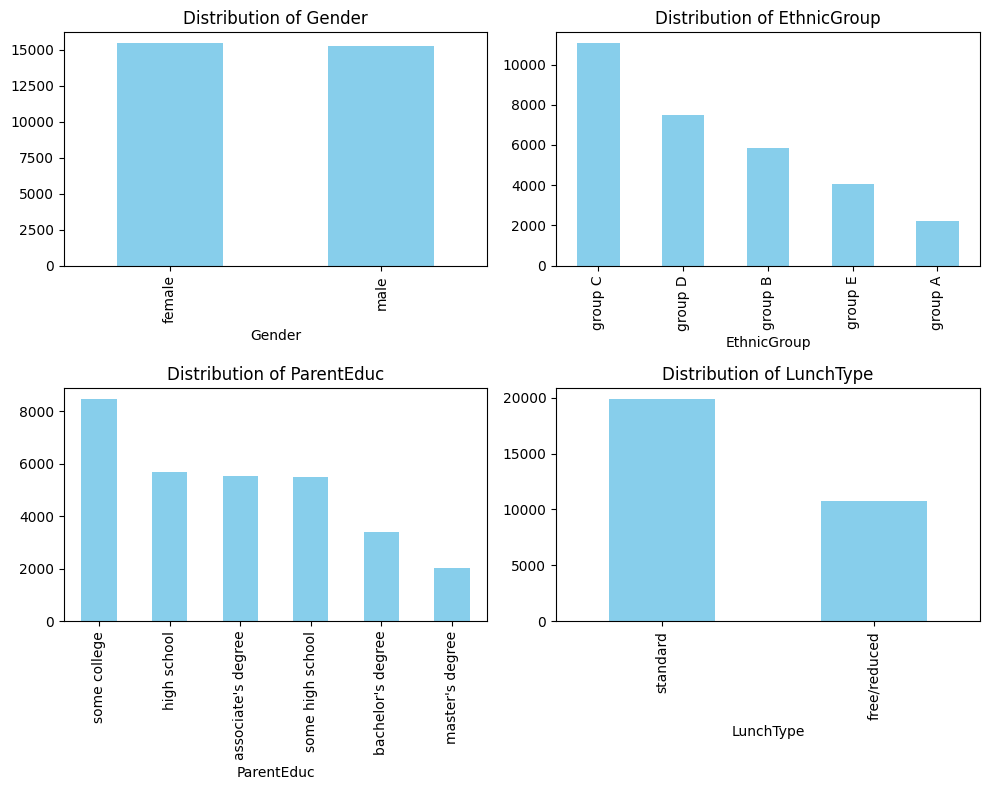

In [44]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a figure and an array of subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# List of columns to plot
columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType']

# Specify the color for the bar plots
bar_color = 'skyblue'

# Iterate over the columns and axes to create bar plots
for ax, col in zip(axes.flat, columns):
    # Plot the value counts of the column as a bar plot
    data[col].value_counts().plot(kind='bar', ax=ax, color=bar_color)
    # Set the title of the subplot
    ax.set_title(f"Distribution of {col}")

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()



#### Detailed Explanation for Each Plot : 
Distribution of Gender:

- Purpose: To show the distribution of male and female students in the dataset.

- X-Axis: Gender categories ('female', 'male').
- Y-Axis: Count of students in each gender category.
- Insight: This graph helps in understanding the gender composition of the dataset, showing a nearly equal distribution between male and female students.

Distribution of EthnicGroup:

- Purpose: To show the distribution of students across different ethnic groups.
- X-Axis: Ethnic group categories (e.g., 'group A', 'group B', etc.).
-Y-Axis: Count of students in each ethnic group.
- Insight: This graph indicates that 'group C' is the most represented ethnic group in the dataset, followed by 'group D', 'group B', 'group E', and 'group A'.

Distribution of ParentEduc:

- Purpose: To show the distribution of parental education levels among the students.
- X-Axis: Parental education levels (e.g., 'some college', 'high school', etc.).
- Y-Axis: Count of students whose parents have each level of education.
- Insight: This graph reveals that most students' parents have 'some college' education, followed by 'high school', 'associates degree', 'some high school', 'bachelor's degree', and 'master's degree'.

Distribution of LunchType:

- Purpose: To show the distribution of lunch types provided to students.
- X-Axis: Lunch types ('standard', 'free/reduced').
- Y-Axis: Count of students receiving each type of lunch.
- Insight: This graph shows that a majority of students receive 'standard' lunch, while a smaller portion receives 'free/reduced' lunch.

Overall Explanation:

These bar plots provide a visual summary of the categorical data in the dataset, helping to identify the distribution and frequency of different categories within each feature. This information is useful for understanding the demographic and socio-economic composition of the student population in the dataset.

###  Score

In [45]:
plt.figure(figsize=(10,8))
sns.histplot(data[['ReadingScore', 'MathScore', 'WritingScore']], kde=True, bins=100)
plt.title('Distribution of the test scores')

Text(0.5, 1.0, 'Distribution of the test scores')

### Insights from the Graph

##### Overall Distribution:

All three subjects (Reading, Math, Writing) show a similar overall distribution, with scores mostly clustered between 40 and 80.

##### Performance Comparison:

Reading and Writing: These scores tend to have a higher frequency at the upper end (closer to 100), suggesting that students generally perform better in these subjects.
Math: The distribution is slightly lower compared to Reading and Writing, indicating relatively lower performance in Math.

##### Score Ranges:

High Scores (80-100): More students score higher in Reading and Writing compared to Math.
Middle Scores (40-80): This range shows the highest concentration of scores for all three subjects, indicating that most students score in this middle range.

##### Minimum and Maximum Scores:

All three subjects have students scoring the maximum (100).
The minimum scores vary slightly, with some subjects showing scores starting closer to zero.


In [46]:
data[['ReadingScore', 'MathScore', 'WritingScore']].agg([np.mean, np.std, np.max, np.min])

,ReadingScore,MathScore,WritingScore
mean,69.377533,66.558402,68.418622
std,14.758952,15.361616,15.443525
amax,100.000000,100.000000,100.000000
amin,10.000000,0.000000,4.000000


####  Ethnic Group

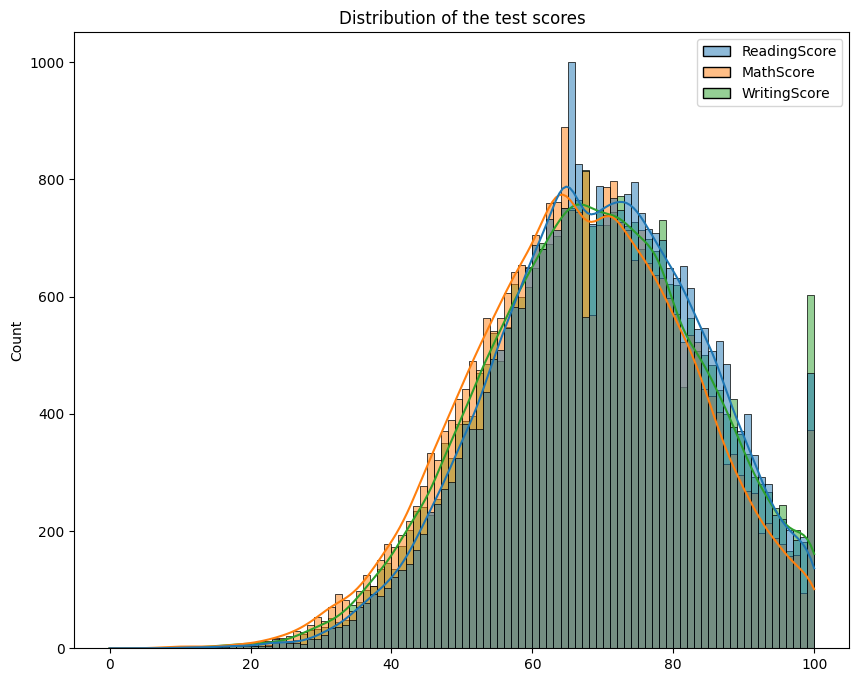

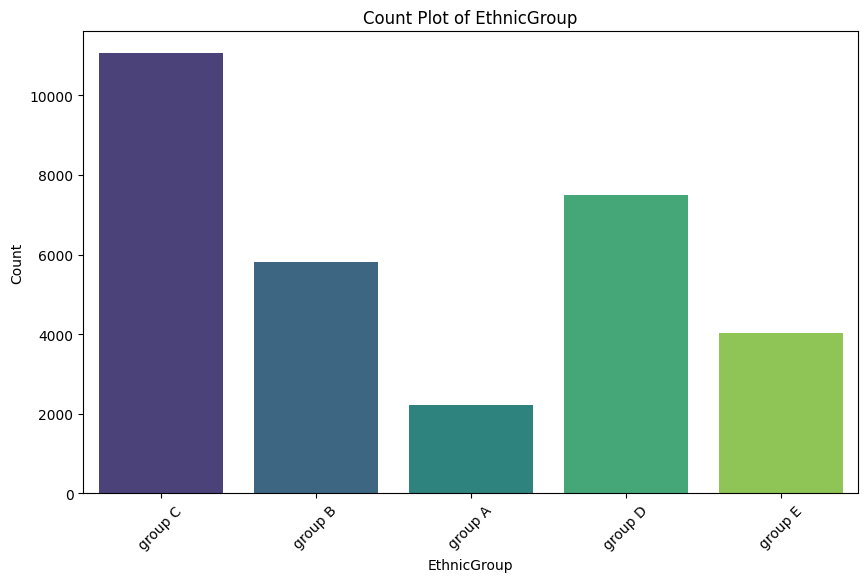

In [47]:
count_plot(data, "EthnicGroup")

### Type of Lunch

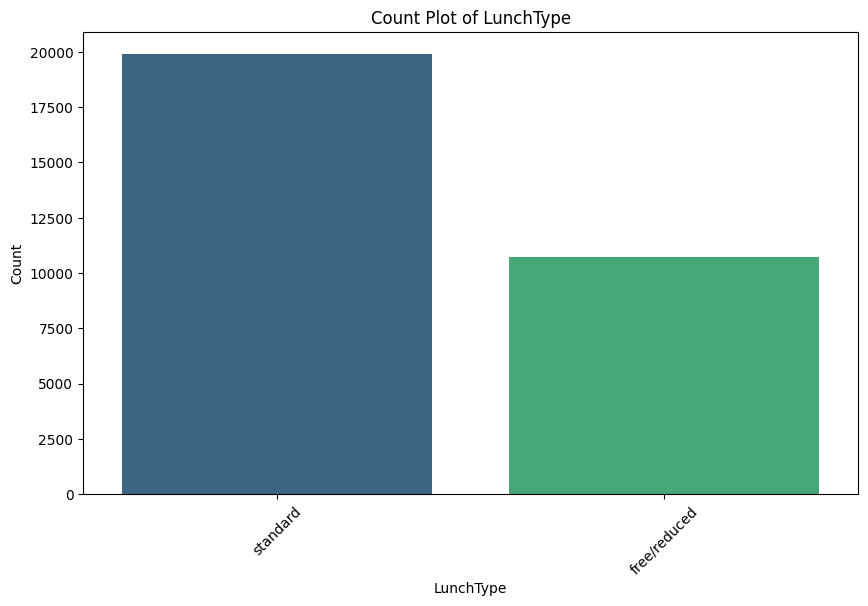

In [48]:
count_plot(data, 'LunchType')

* most students eat a standard lunch

#### vi. Parent Marital Status

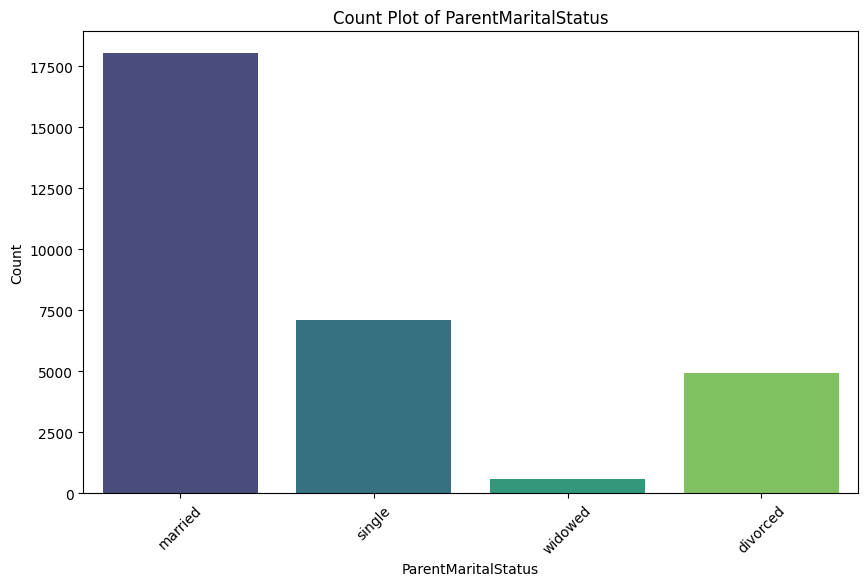

In [49]:
count_plot(data, 'ParentMaritalStatus')


- Most students have married parents

####  FIrst child or not?

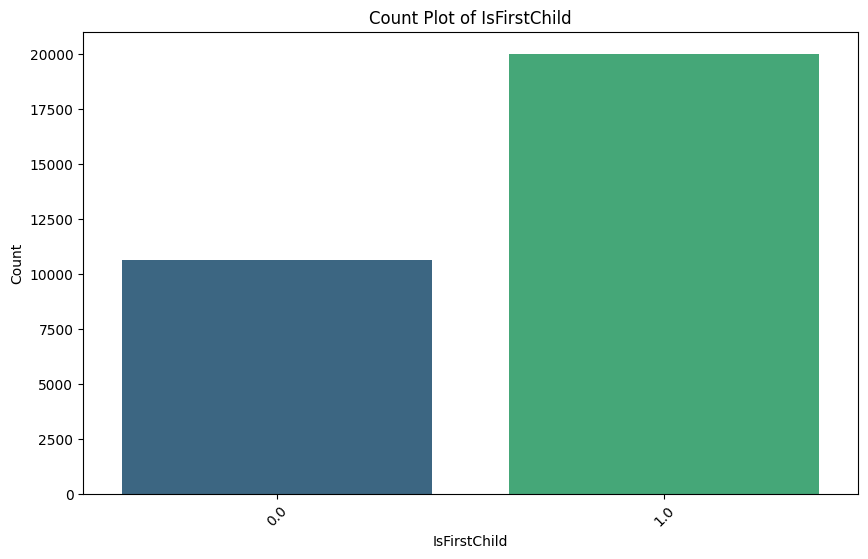

In [50]:
count_plot(data, 'IsFirstChild')



* Most of the students here are first children

#### Number of siblings

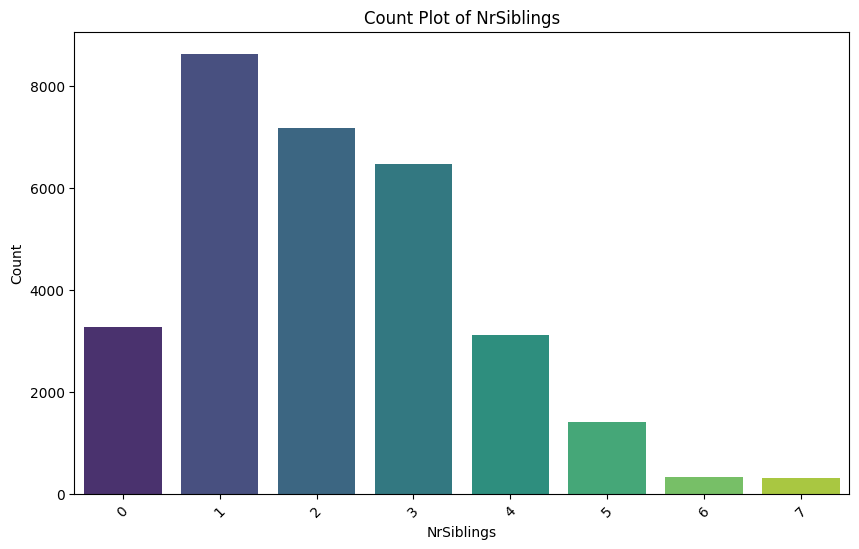

In [51]:
count_plot(data, 'NrSiblings')

* Sibling rate from 1 to 3

#### Correlation between the numeric columns

In [52]:
num_cols = data[['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']]
corr = num_cols.corr()
corr

,NrSiblings,MathScore,ReadingScore,WritingScore
NrSiblings,1.000000,0.000917,0.001210,-0.000541
MathScore,0.000917,1.000000,0.817825,0.807118
ReadingScore,0.001210,0.817825,1.000000,0.952584
WritingScore,-0.000541,0.807118,0.952584,1.000000


#### Observation:
* number of siblings has nothing to do with scores
* students with high reading score are more likely to have a high writing score
* same cannot be said for math scores

### Relationship between Students Score and Ethnic Group

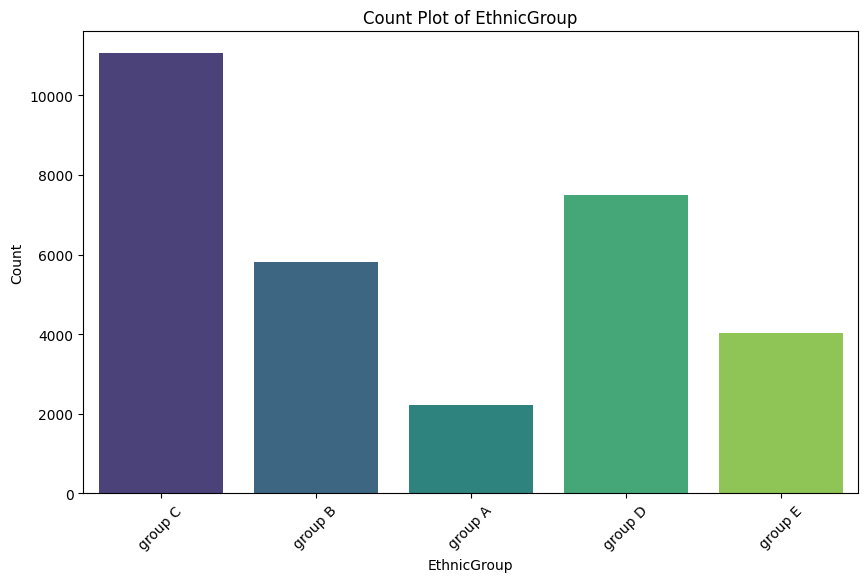

In [53]:

def grouped_on_mathscore(data, column_name):
    """
    Creates a count plot for a specified column in the DataFrame.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    
    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column_name, palette='viridis')
    plt.title(f'Count Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Example usage:
count_plot(data, 'EthnicGroup')


* Across all metrics, Group E consistently outperforms other ethnic groups.

* Remarkably, Group E achieves its highest scores in mathematics compared to its performance in other subjects.
* Further investigation into this phenomenon is warranted, particularly in relation to other variables.

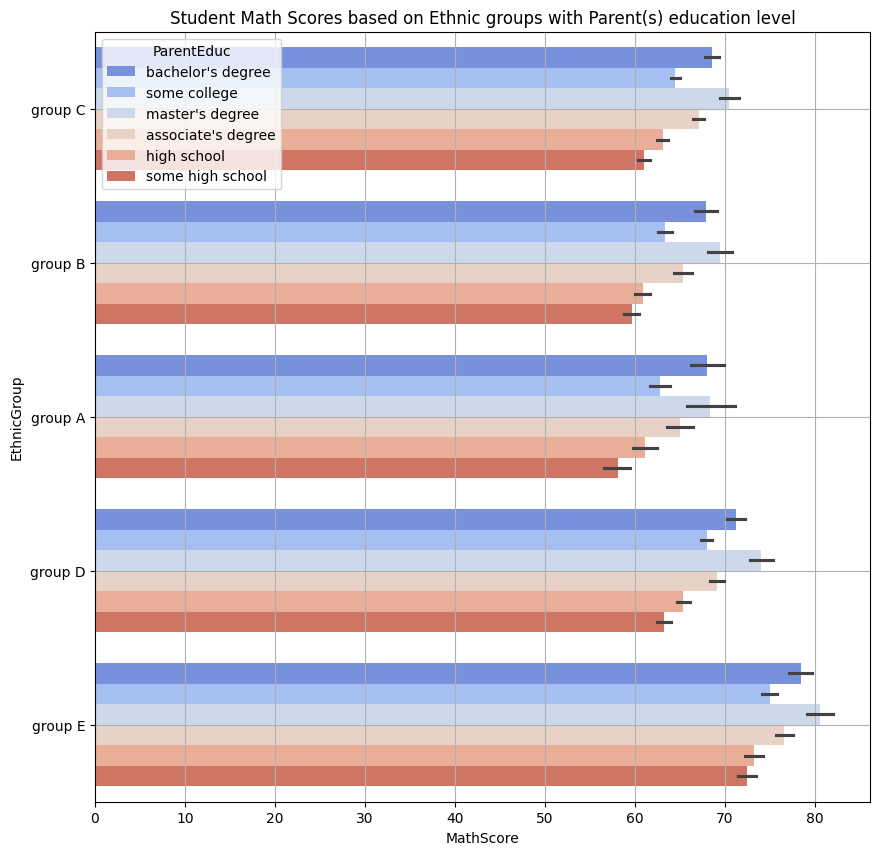

In [54]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, y="EthnicGroup", x="MathScore", hue='ParentEduc', palette='coolwarm')
plt.title('Student Math Scores based on Ethnic groups with Parent(s) education level')
plt.grid(True)
plt.show()


It's logical that students whose parents hold master's or bachelor's degrees tend to excel academically compared to those with parents who have different educational backgrounds. Notably, Group E stands out for having the highest percentage of parents with master's and bachelor's degrees compared to other groups.

### Relationship between Students score and Parent(s) education level

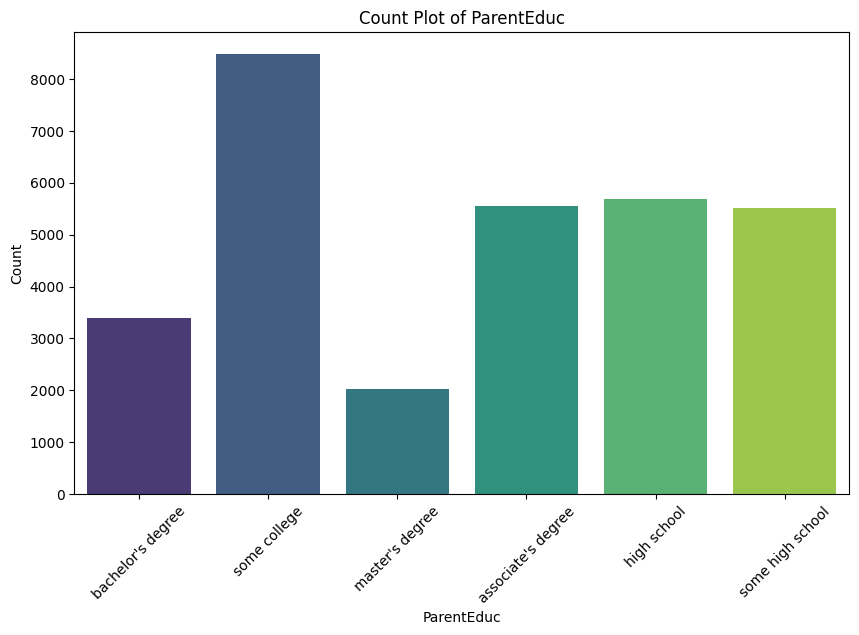

In [55]:
grouped_on_mathscore(data, 'ParentEduc')


Consistent with previous observations, students with parents holding master's and bachelor's degrees demonstrated superior academic performance compared to those with other educational backgrounds.

### Relationship between Test Preparation status and students score

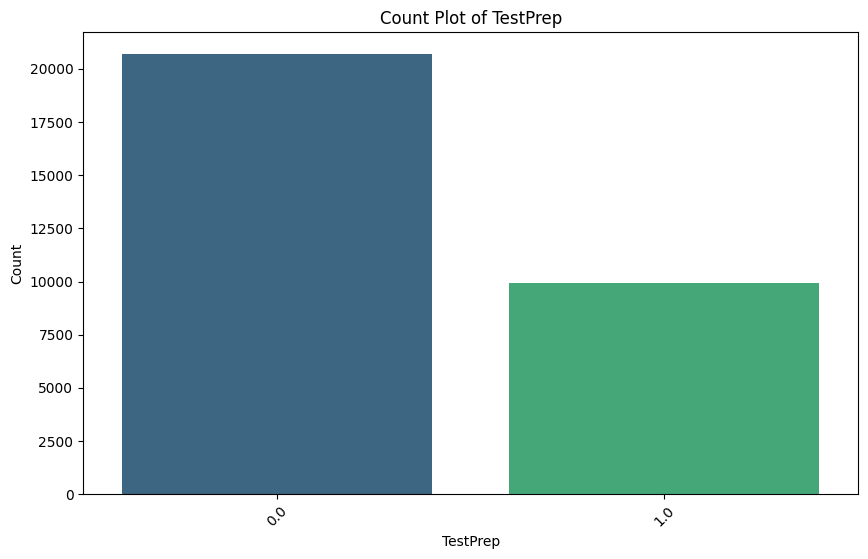

In [56]:
grouped_on_mathscore(data, 'TestPrep')

Adequate test preparation, particularly for reading and writing exams, is crucial for better performance.
Now, let's explore whether there's any correlation between this factor and ethnic groups.

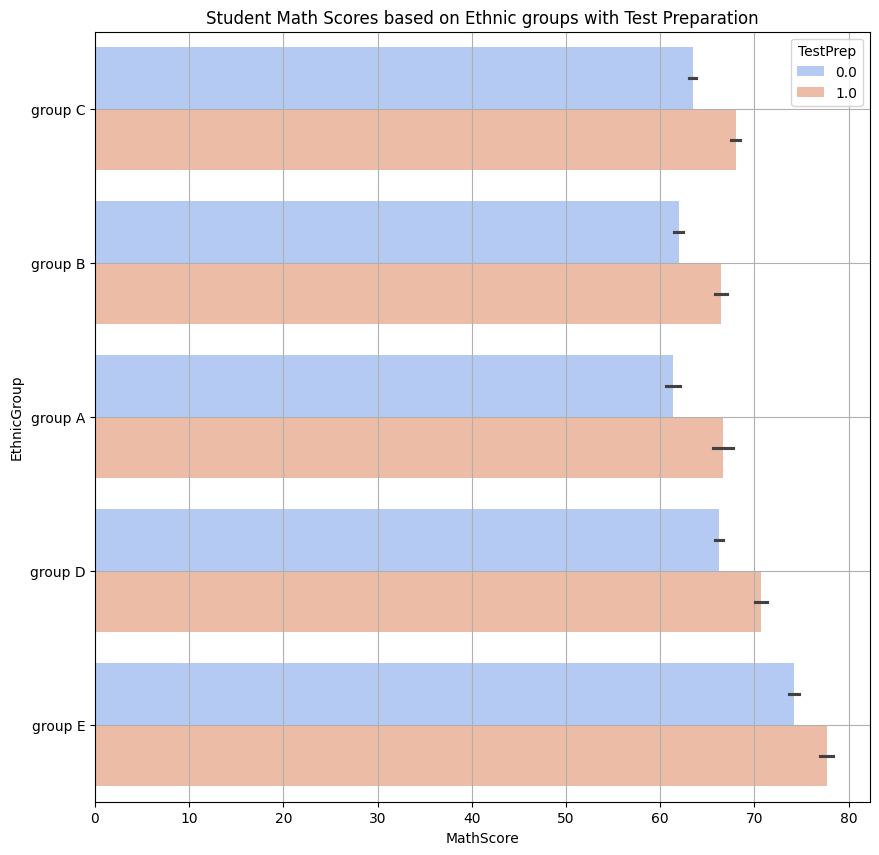

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, y="EthnicGroup", x="MathScore", hue='TestPrep',palette='coolwarm')
plt.title('Student Math Scores based on Ethnic groups with Test Preparation')
plt.grid(True)
plt.show()

 Group E is excelling.


###  Relationship between if the child is the first chold or not and students score

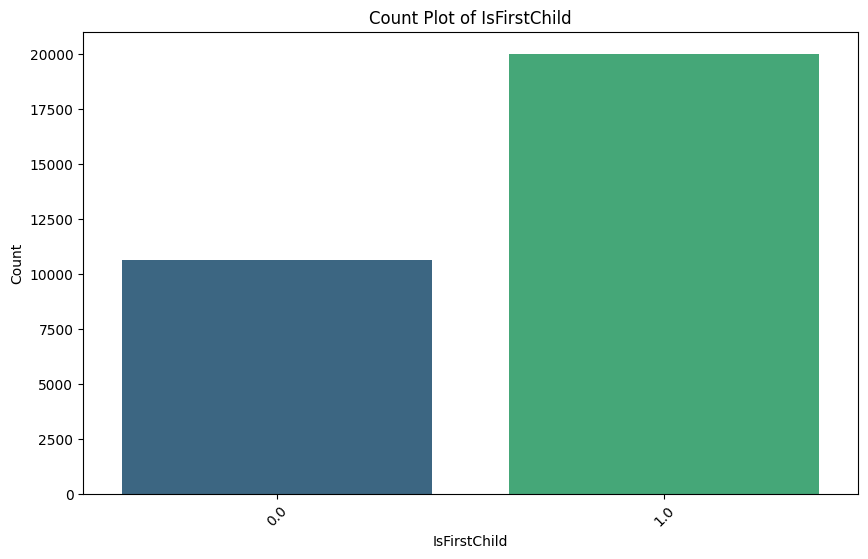

In [58]:
grouped_on_mathscore(data, 'IsFirstChild')


This feature shows minimal variation.


### Conclusion


In this dataset, several factors correlate with students' scores in mathematics, reading, and writing:

Higher level of parental education leads to better student performance.
Students who consume standard lunch tend to perform better.
Completing test preparation is associated with higher scores.
Occasional participation in sports correlates with better performance.
Students who study 5 to 10 hours per week tend to achieve higher scores.


    
# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Data Encryption:</span></b>


One-hot encoding is used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions. It transforms each category into a new binary column, making the data suitable for numerical computations. This technique helps in capturing the presence or absence of a category without implying any ordinal relationship.

Normalizing numerical columns can indeed help improve the accuracy of machine learning models, especially for algorithms like Support Vector Regression (SVR), which can be sensitive to the scale of the data.

In [66]:

def one_hot_encode_columns(df, columns):
    """
    Applies one-hot encoding to specified columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to encode.
    columns (list of str): List of column names to encode.

    Returns:
    pd.DataFrame: The DataFrame with one-hot encoded columns.
    """
    return pd.get_dummies(df, columns=columns, prefix=columns)

def normalize_columns(df, columns):
    """
    Normalizes specified numerical columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to normalize.
    columns (list of str): List of column names to normalize.

    Returns:
    pd.DataFrame: The DataFrame with normalized numerical columns.
    """
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

In [67]:
# Ensure all categorical columns are encoded properly
data_encoded1 = pd.get_dummies(data_encoded1, drop_first=True)

# Drop rows with missing values in the combined dataset
data_encoded1 = data_encoded1.dropna()

NameError: name 'data_encoded1' is not defined

* This approach ensures that both categorical and numerical columns are correctly included in the final DataFrames.

# 2:  MLOps Design Patterns

In [61]:
# Define the features and targets
X = data_encoded1.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis=1)  # Features
y = data_encoded1[['MathScore', 'ReadingScore', 'WritingScore']]  # Targets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'data_encoded1' is not defined


    
# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'> Train and Evaluate the SVR Model:</span></b>


### Model Design Based on Student Exam Result Data 

#### Train SVR Model for Each Target Variable



In [62]:
# Initialize and fit SVR models
svr_math = SVR(kernel='linear')
svr_reading = SVR(kernel='linear')
svr_writing = SVR(kernel='linear')

svr_math.fit(X_train, y_train['MathScore'])
svr_reading.fit(X_train, y_train['ReadingScore'])
svr_writing.fit(X_train, y_train['WritingScore'])

# Make predictions on the test set
math_pred = svr_math.predict(X_test)
reading_pred = svr_reading.predict(X_test)
writing_pred = svr_writing.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_math = mean_squared_error(y_test['MathScore'], math_pred)
mse_reading = mean_squared_error(y_test['ReadingScore'], reading_pred)
mse_writing = mean_squared_error(y_test['WritingScore'], writing_pred)

# Print results and MSE
print("Math Score Predictions:", math_pred)
print("Reading Score Predictions:", reading_pred)
print("Writing Score Predictions:", writing_pred)

print("Math Score MSE:", mse_math)
print("Reading Score MSE:", mse_reading)
print("Writing Score MSE:", mse_writing)


NameError: name 'X_train' is not defined

#### Train SVR Model on the Entire Training Set and Evaluate on the Test Set



In [ ]:
# Train the models on the entire training set
svr_math = SVR(kernel='linear')
svr_reading = SVR(kernel='linear')
svr_writing = SVR(kernel='linear')

svr_math.fit(X_train, y_train['MathScore'])
svr_reading.fit(X_train, y_train['ReadingScore'])
svr_writing.fit(X_train, y_train['WritingScore'])

# Predictions
pred_math = svr_math.predict(X_test)
pred_reading = svr_reading.predict(X_test)
pred_writing = svr_writing.predict(X_test)

# Calculate and print test set MSE
mse_math = mean_squared_error(y_test['MathScore'], pred_math)
mse_reading = mean_squared_error(y_test['ReadingScore'], pred_reading)
mse_writing = mean_squared_error(y_test['WritingScore'], pred_writing)

print("Math Score Test MSE:", mse_math)
print("Reading Score Test MSE:", mse_reading)
print("Writing Score Test MSE:", mse_writing)



# <b><span style='color:#fcc36d'></span><span style='color:#ff6200'>Apply Software Product Design According to Student Exam Result Data :</span></b>


In [ ]:
def predict_features(
    Gender, EthnicGroup, ParentEduc, LunchType, TestPrep,
    ParentMaritalStatus, PracticeSport, IsFirstChild, NrSiblings, TransportMeans, WklyStudyHours):
    
    input_data = pd.DataFrame({
        'Gender': [Gender],
        'EthnicGroup': [EthnicGroup],
        'ParentEduc': [ParentEduc],
        'LunchType': [LunchType],
        'TestPrep': [TestPrep],
        'ParentMaritalStatus': [ParentMaritalStatus],
        'PracticeSport': [PracticeSport],
        'IsFirstChild': [IsFirstChild],
        'NrSiblings': [NrSiblings],
        'TransportMeans': [TransportMeans],
        'WklyStudyHours': [WklyStudyHours]
    })

    input_data = pd.get_dummies(input_data, drop_first=True)
    input_data = input_data.reindex(columns=X_train.columns, fill_value=0)
    
    # Predict the scores
    math_pred = svr_math.predict(input_data)[0]
    reading_pred = svr_reading.predict(input_data)[0]
    writing_pred = svr_writing.predict(input_data)[0]
    
    return math_pred, reading_pred, writing_pred

# Extract the unique values for dropdowns from the dataset
ethnic_group_choices = data_encoded1.columns[data_encoded1.columns.str.startswith('EthnicGroup_')].str.replace('EthnicGroup_', '').tolist()
parent_educ_choices = data_encoded1.columns[data_encoded1.columns.str.startswith('ParentEduc_')].str.replace('ParentEduc_', '').tolist()
parent_marital_status_choices = data_encoded1.columns[data_encoded1.columns.str.startswith('ParentMaritalStatus_')].str.replace('ParentMaritalStatus_', '').tolist()
wkly_study_hours_choices = data_encoded1.columns[data_encoded1.columns.str.startswith('WklyStudyHours_')].str.replace('WklyStudyHours_', '').tolist()

# Create Gradio interface
interface = gr.Interface(
    fn=predict_features,
    inputs=[
        gr.Dropdown(label="Gender", choices=['female', 'male']),
        gr.Dropdown(label="EthnicGroup", choices=ethnic_group_choices),
        gr.Dropdown(label="ParentEduc", choices=parent_educ_choices),
        gr.Dropdown(label="LunchType", choices=['standard', 'free/reduced']),
        gr.Dropdown(label="TestPrep", choices=['none', 'completed']),
        gr.Dropdown(label="ParentMaritalStatus", choices=parent_marital_status_choices),
        gr.Dropdown(label="PracticeSport", choices=['never', 'sometimes', 'regularly']),
        gr.Radio(label="IsFirstChild", choices=['no', 'yes']),
        gr.Number(label="NrSiblings"),
        gr.Dropdown(label="TransportMeans", choices=['private', 'school_bus']),
        gr.Dropdown(label="WklyStudyHours", choices=wkly_study_hours_choices)
    ],
    outputs=[
        gr.Textbox(label="Predicted Math Score"),
        gr.Textbox(label="Predicted Reading Score"),
        gr.Textbox(label="Predicted Writing Score")
    ],
    title="Student Performance Predictor",
    description="Predict the performance of a student based on various features."
)

# Launch the interface
interface.launch()



# 3 MLOps

## 3.1 Explainable Artificial Intelligence (XAI) Techniques

 In the future, I plan to apply explainable AI techniques to make the predictions of my models more understandable and transparent.
 
 The following steps outline how I will approach this:

 1. Feature Importance: 
    - I will use methods like SHAP (SHapley Additive exPlanations) to understand the impact of each feature on the predictions.
    - This will help identify which features are most influential in predicting exam scores.
 
 2. Partial Dependence Plots (PDP):
    - PDPs will be used to show the relationship between the target variables (MathScore, ReadingScore, WritingScore) and the most important features.
    - These plots will illustrate how changes in a feature affect the model’s predictions.

 3. Local Interpretable Model-agnostic Explanations (LIME):
    - LIME will be applied to generate explanations for individual predictions.
    - By perturbing the input data and observing changes in predictions, LIME will help explain the model’s behavior for specific instances.
 
 4. Model Inspection:
   - I will inspect the internal workings of the models to understand how they process input features.
   - Techniques like coefficient analysis in linear models (like SVR with a linear kernel) will be used to interpret the weights assigned to features.

By implementing these XAI techniques, I will ensure that the predictions made by my models are not only accurate but also interpretable and transparent.


## 3.2 Explain how you ensure data security with examples over data.

#### Ensuring Data Security:

Data security is crucial in any data science project. Here are the steps I take to ensure data security:

1. Data Encryption:
   - I use encryption techniques to protect data at rest and in transit.
   - For example, I encrypt the dataset files using tools like GPG (GNU Privacy Guard) before storing them on disk or transferring them over the network.

2. Access Control:
   - I implement strict access control measures to ensure that only authorized personnel can access the data.
   - For instance, I use role-based access control (RBAC) to assign different levels of access permissions to different users based on their roles.

3. Data Anonymization:
   - I anonymize sensitive data to protect the privacy of individuals.
   - Techniques such as masking, pseudonymization, and generalization are applied to remove or transform personally identifiable information (PII).

4. Secure Coding Practices:
   - I follow secure coding practices to prevent vulnerabilities in the code.
   - This includes validating inputs, using prepared statements for database queries, and regularly updating dependencies to fix security issues.

5. Regular Audits:
   - I conduct regular audits and reviews of the data security measures to identify and address potential vulnerabilities.
   - This includes checking access logs, monitoring for unauthorized access attempts, and performing security assessments.



## 3.3 How do you provide continuous integration, explain with examples.

### Continuous Integration (CI)

Continuous Integration (CI) is a development practice where developers integrate code into a shared repository frequently. Here’s how I ensure CI in my project:

1. Version Control:

I use Git for version control to manage changes to the codebase.
All changes are committed to a shared repository on platforms like GitHub or GitLab.

2. Automated Testing:

I set up automated tests that run every time new code is committed.
For example, I use tools like pytest to run unit tests, ensuring that new changes do not break existing functionality.

3. CI Tools:

I use CI tools like GitHub Actions or Jenkins to automate the integration process.
These tools automatically run the tests and build the project every time code is pushed to the repository.

4. Code Review:

I implement a code review process where peers review the code before it is merged into the main branch.
This helps catch errors and ensure code quality.
By following these steps, I ensure that my project has a robust CI pipeline that catches errors early, maintains code quality, and facilitates smooth collaboration among team members.







## 3.4 How do you provide continuous delivery, explain with examples

### Continuous Delivery (CD)

Continuous Delivery (CD) is a software development practice where code changes are automatically prepared for a release to production.
Here are the steps I take to ensure CD in my project:

1. Automated Testing:
   - I ensure that all code changes pass a suite of automated tests before they are considered for deployment.
   - These tests include unit tests, integration tests, and end-to-end tests.

2. CI/CD Pipeline:
   - I use CI/CD tools like GitHub Actions, Jenkins, or GitLab CI/CD to automate the build and deployment process.
   - The pipeline automatically builds the project, runs tests, and, if all tests pass, deploys the code to a staging environment.

3. Staging Environment:
   - I deploy code to a staging environment that mimics the production environment.
   - This allows for thorough testing in an environment similar to production before deploying to the live system.

4. Manual Approval:
   - While most of the process is automated, I include a manual approval step before deploying to production.
   - This ensures that a human reviews the changes and confirms they are ready for release.

5. Continuous Monitoring:
   - After deployment, I continuously monitor the application to catch any issues early.
   - Monitoring tools like Prometheus and Grafana help track the application's performance and alert me to potential problems.

6. Rollback Strategy:
   - I have a rollback strategy in place in case something goes wrong after deployment.
   - This involves maintaining previous versions of the application that can be redeployed if necessary.

By implementing these steps, I ensure that the deployment process is reliable, efficient, and can quickly deliver new features and fixes to users.


# 4 Feedbacks 

## 4.1 Please indicate what we did well in the course during the semester

### What We Did Well in the Course

The MLOps course has been incredibly engaging and insightful. Here are some of the highlights:

1. Engaging Lessons with Kahoot:

Before each lesson, we participated in Kahoot quizzes which made the learning process fun and interactive.
These quizzes helped us review key concepts and stay engaged throughout the course.

2. Practical Examples:

The practical examples provided during the lessons were extremely valuable.
They helped us understand real-world scenarios we will encounter when we start working.
These examples deepened our understanding of MLOps and prepared us for practical implementation and problem-solving.

3. Assignments and Hands-on Projects:

The assignments were very well-designed and helped us focus more on the subject.
Working on these assignments reinforced the concepts we learned and provided practical experience.
The project work, recommended to be done in groups, was particularly beneficial. I formed a team of three, and we have been collaborating effectively on our project, which is still in progress.
Overall, the course was not only educational but also enjoyable. The combination of interactive quizzes, practical examples, and group projects made the learning experience comprehensive and engaging. We feel well-prepared to apply MLOps concepts in real-world applications and tackle any challenges we may encounter.

## 4.2 Please indicate what we did badly in the course during the semester. 

 believe that there wasn't anything we did badly in the course. Here are some reasons why:

1. Well-Structured Assignments and Projects:

The assignments and presentation projects were well-organized and effectively reinforced our learning.
These tasks helped us apply the concepts we learned in a practical manner.

2. Paced Learning:

We progressed through the important lessons at a measured pace.
There was no rush in explaining crucial topics, ensuring that everyone could understand the material thoroughly.

3. Comprehensive Explanation:

The explanations were complete and clear, covering all necessary aspects of the topics.
You were always available to help us with any questions or points we didn't understand in the lesson.

Overall, the course was well-designed and executed. The structure, pace, and support provided were excellent, making the learning process smooth and effective.

## 4.3 How can we improve the course for the next semesters

The course has been very effective and continues in this way, it will be very wonderful for the upcoming students. I only have these two notes that I believe will benefit the upcoming courses in further development:

1. Advanced Topics and Tools:

Introduce advanced topics and tools related to MLOps, such as Kubernetes, Docker, and CI/CD pipelines.
This will ensure that students are well-versed with the latest technologies and practices in the field.

2. Feedback and Iteration:

Continuously gather feedback from students about the course and make iterative improvements based on their suggestions.
This will help in tailoring the course to better meet the needs and expectations of future students.

The course can become even more engaging and effective, providing students with a comprehensive understanding of MLOps and preparing them for real-world applications.